In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log

plt.rcParams["figure.figsize"] = (20,10)


In [113]:
pinaPrices = []
cocoPrices = []
pinaPositions = []
cocoPositions = []

with open("log.txt", "r") as f:
    lines = [line.strip() for line in f.readlines()]

timestamps = [lines[i] for i in range(0, len(lines), 5)]
pinaPrices = [lines[i] for i in range(1, len(lines), 5)]
cocoPrices = [lines[i] for i in range(2, len(lines), 5)]
pinaPositions = [lines[i] for i in range(3, len(lines), 5)]
cocoPositions = [lines[i] for i in range(4, len(lines), 5)]

In [114]:
df = pd.DataFrame({"pinaPrices": pinaPrices, "cocoPrices": cocoPrices, "pinaPositions": pinaPositions, "cocoPositions": cocoPositions})
get_value = lambda x : x.split(": ")[1]
df = df.applymap(get_value)
df["timestamp"] = [timestamp.split(" ")[0] for timestamp in timestamps]
df = df.astype(float)

In [118]:
df["pina/coco"] = df["pinaPrices"] / df["cocoPrices"]
df["pina - coco"] = df["pinaPrices"] - df["cocoPrices"]
df["price_ratio"] = df["pina/coco"].apply(log)

Text(0.5, 1.0, 'Price Difference')

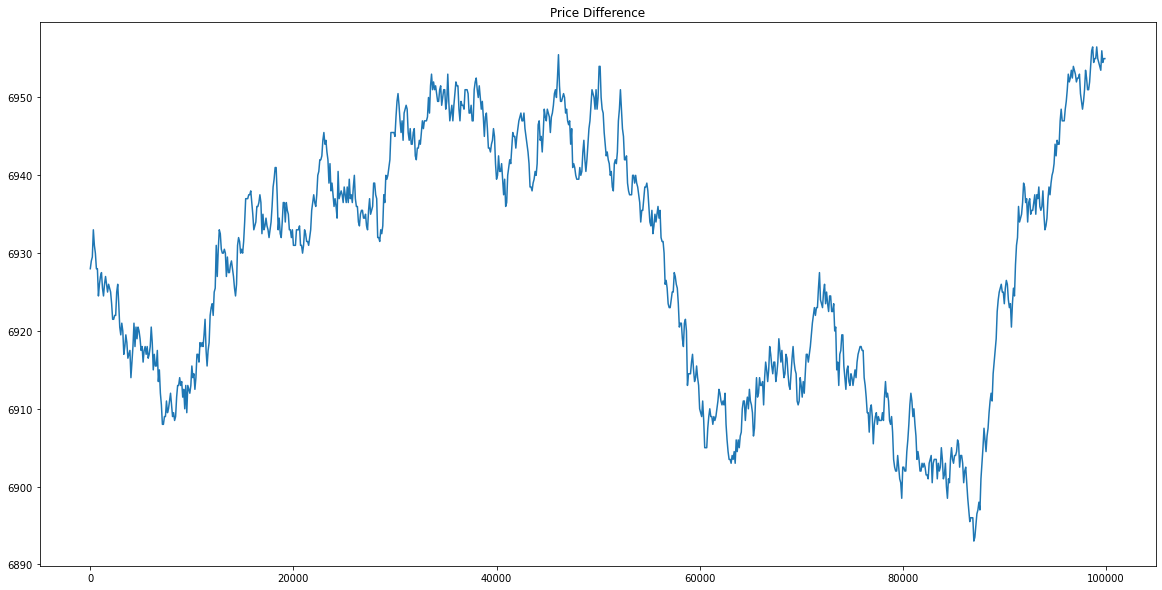

In [119]:
# plot the price difference
plt.plot(df["timestamp"], df["pina - coco"])
plt.title("Price Difference")

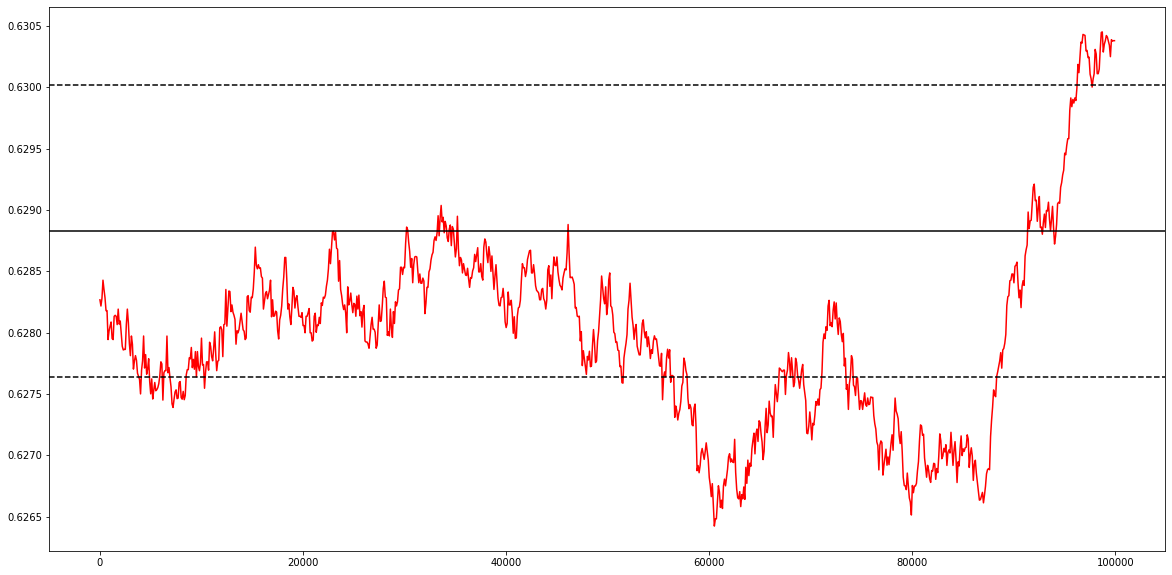

In [116]:
mean = 0.6288272247232621
std = 0.002382788768726835
fig, ax1 = plt.subplots()
# # ax2 = ax1.twinx()
ax1.plot(df["timestamp"], df["price_ratio"], color="red")
# make horizontal line at mean and dotted lines at mean + 0.5*std and mean - 0.5*std
ax1.axhline(y=mean, color="black", linestyle="-")
ax1.axhline(y=mean + 0.5*std, color="black", linestyle="--")
ax1.axhline(y=mean - 0.5*std, color="black", linestyle="--")

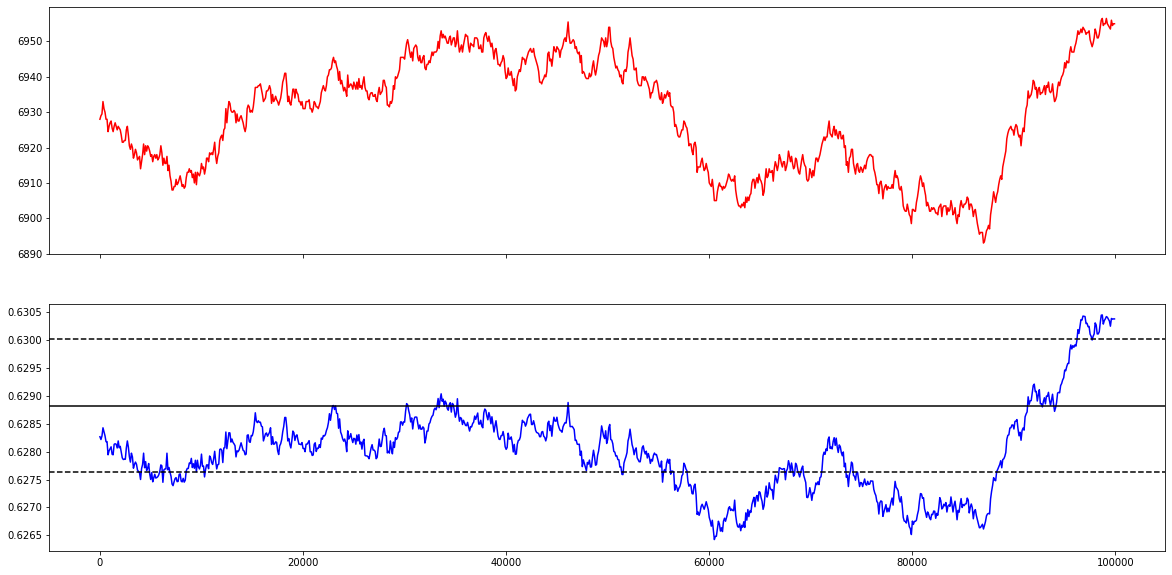

In [120]:
#stack the pina-coco and price_ratio graphs one on top of the other
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(df["timestamp"], df["pina - coco"], color="red")
ax2.plot(df["timestamp"], df["price_ratio"], color="blue")
ax2.axhline(y=mean, color="black", linestyle="-")
ax2.axhline(y=mean + 0.5*std, color="black", linestyle="--")
ax2.axhline(y=mean - 0.5*std, color="black", linestyle="--")

In [102]:
price1 = pd.read_csv("price1.csv", sep=";")
price2 = pd.read_csv("price2.csv", sep=";")
price3 = pd.read_csv("price3.csv", sep=";")
price4 = pd.read_csv("price4.csv", sep=";")
# remove the columns we don't care about
price1 = pd.read_csv("price1.csv", sep=";")
price2 = pd.read_csv("price2.csv", sep=";")
price3 = pd.read_csv("price3.csv", sep=";")
price4 = price4[["product", "mid_price", "timestamp"]]

In [103]:
# convert timestamp in each one to a float, and make it the index
price1["timestamp"] = price1["timestamp"].apply(lambda x : float(x))
price1 = price1.set_index("timestamp")
price2["timestamp"] = price2["timestamp"].apply(lambda x : float(x))
price2 = price2.set_index("timestamp")
price3["timestamp"] = price3["timestamp"].apply(lambda x : float(x))
price3 = price3.set_index("timestamp")
price4["timestamp"] = price4["timestamp"].apply(lambda x : float(x))
price4 = price4.set_index("timestamp")
# to every timestamp in price2, add the last timestamp in price1 +100
price2.index = price2.index + price1.index[-1] + 100
# to every timestamp in price3, add the last timestamp in price2 +100
price3.index = price3.index + price2.index[-1] + 100
# to every timestamp in price4, add the last timestamp in price3 +100
price4.index = price4.index + price3.index[-1] + 100

In [104]:
combined = pd.concat([price1, price2, price3, price4])

pina = combined[combined["product"] == "PINA_COLADAS"]
coco = combined[combined["product"] == "COCONUTS"]
pina = pina.drop(columns=["product"])
coco = coco.drop(columns=["product"])
pina = pina.rename(columns={"mid_price": "pina_price"})
coco = coco.rename(columns={"mid_price": "coco_price"})
df = pd.concat([pina, coco], axis=1)
df.head()

,pina_price,coco_price
timestamp,,
0.0,15000.0,8000.0
100.0,15000.0,7999.5
200.0,14999.5,7998.5
300.0,15000.0,7999.5
400.0,14999.0,7998.5


In [109]:
df["pina/coco"] = df["pina_price"] / df["coco_price"]
df["pina-coco"] = df["pina_price"] - df["coco_price"]
df["logPriceRatio"] = df["pina/coco"].apply(log)
logAvg = df["logPriceRatio"].mean()
logStd = df["logPriceRatio"].std()
print("logAvg: ", logAvg)
print("logStd: ", logStd)

logAvg:  0.6288272247232621
logStd:  0.002382788768726835


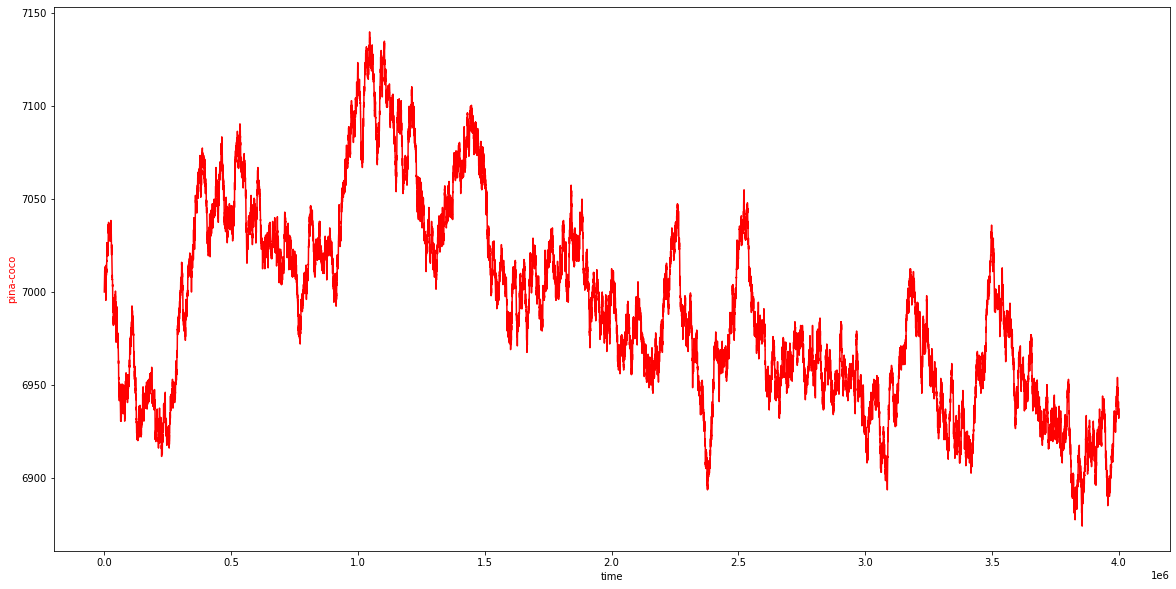

In [106]:
#plot pina-coco
fig, ax1 = plt.subplots()
ax1.plot(df.index, df["pina-coco"], color="red")
ax1.set_xlabel("time")
ax1.set_ylabel("pina-coco", color="red")

plt.show()

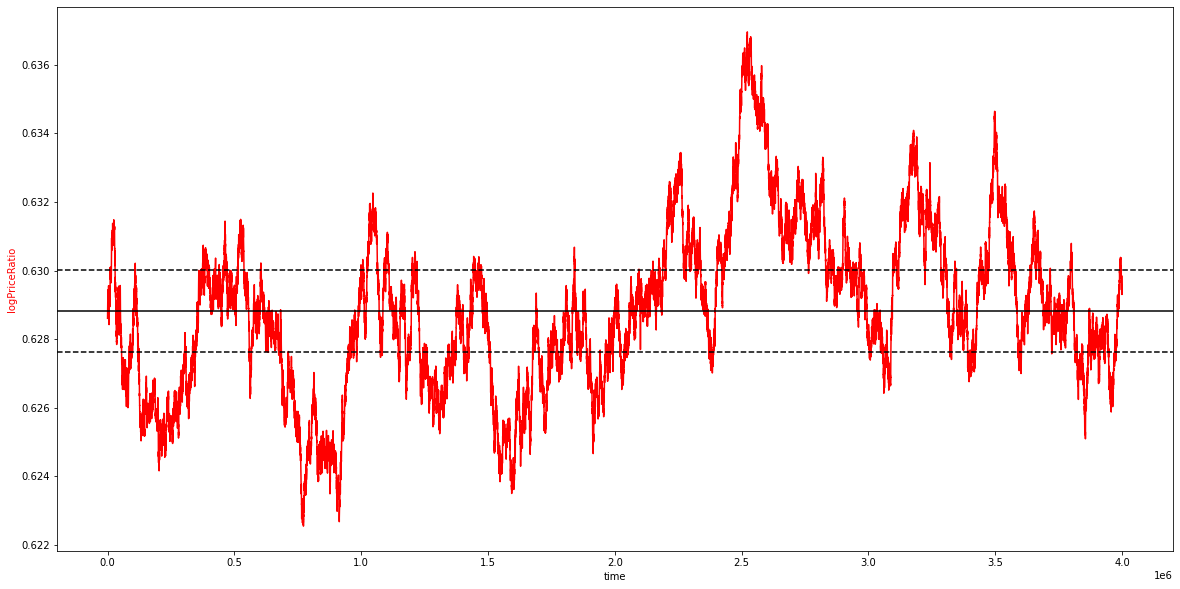

In [107]:
#plot logPriceRatio
fig, ax1 = plt.subplots()
ax1.plot(df.index, df["logPriceRatio"], color="red")
ax1.set_xlabel("time")
ax1.set_ylabel("logPriceRatio", color="red")
#set a horizontal line at the mean
#set a dotted line at mean + std and mean - std
ax1.axhline(y=logAvg, color="black")
ax1.axhline(y=logAvg + 0.5*logStd, color="black", linestyle="--")
ax1.axhline(y=logAvg - 0.5*logStd, color="black", linestyle="--")

plt.show()

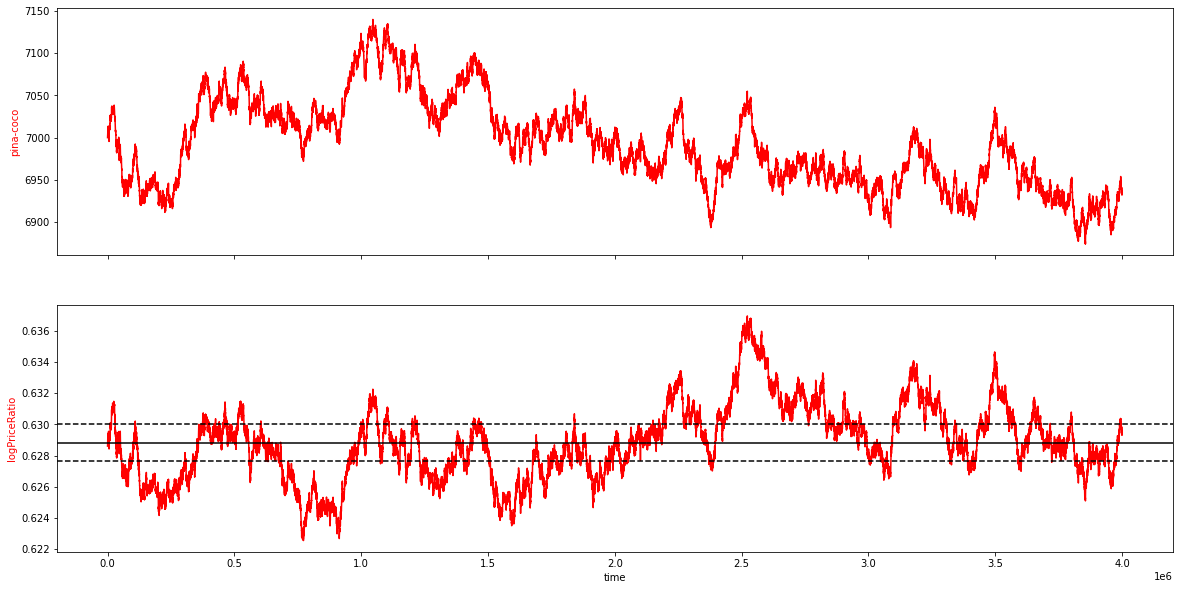

In [108]:
#plot both of these graphs vertically stacked
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(df.index, df["pina-coco"], color="red")
ax1.set_ylabel("pina-coco", color="red")
ax2.plot(df.index, df["logPriceRatio"], color="red")
ax2.set_xlabel("time")
ax2.set_ylabel("logPriceRatio", color="red")
#set a horizontal line at the mean
#set a dotted line at mean + std and mean - std
ax2.axhline(y=logAvg, color="black")
ax2.axhline(y=logAvg + 0.5*logStd, color="black", linestyle="--")
ax2.axhline(y=logAvg - 0.5*logStd, color="black", linestyle="--")

plt.show()